## Unsupervised Machine Learning

### Feature Scaling

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
gt = pd.read_csv('CSVs/globalterrorism10000.csv')
display(gt.shape)
gt.head()

(10000, 42)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,...,vehicl,suspect,suicid,iraq,civilian,islam,taliban,pakistan,maoist,india
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,...,0,1,0,0,0,0,0,0,0,0
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,...,0,1,0,0,0,0,0,0,0,0
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,...,1,0,0,0,0,0,0,0,0,0
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
gt.dtypes

iyear                   int64
imonth                  int64
iday                    int64
more_than_24h           int64
country_txt            object
city                   object
latitude              float64
longitude             float64
news                   object
suicide                 int64
attacktype              int64
attacktype_txt         object
targtype                int64
targtype_txt           object
band_name              object
npeople_attacking       int64
weapon                  int64
weapon_txt             object
nkill                   int64
news_processed         object
positive_sentiment    float64
negative_sentiment    float64
kill                    int64
attack                  int64
damag                   int64
wound                   int64
polic                   int64
explos                  int64
fire                    int64
injur                   int64
shot                    int64
bomb                    int64
vehicl                  int64
suspect   

### One Hot Encoding

In [27]:
cols = ['iyear', 'imonth', 'more_than_24h', 'country_txt', 'suicide', 'attacktype_txt', 'targtype_txt', 'band_name', 'weapon_txt', 'nkill', 'positive_sentiment', 'negative_sentiment', 'kill', 'attack', 'damag', 'wound', 'polic', 'explos', 'fire', 'injur', 'shot', 'bomb', 'vehicl', 'suspect', 'suicid', 'iraq', 'civilian', 'islam', 'taliban', 'pakistan', 'maoist', 'india']

gtk = gt[cols].copy()
gtk.dtypes

iyear                   int64
imonth                  int64
more_than_24h           int64
country_txt            object
suicide                 int64
attacktype_txt         object
targtype_txt           object
band_name              object
weapon_txt             object
nkill                   int64
positive_sentiment    float64
negative_sentiment    float64
kill                    int64
attack                  int64
damag                   int64
wound                   int64
polic                   int64
explos                  int64
fire                    int64
injur                   int64
shot                    int64
bomb                    int64
vehicl                  int64
suspect                 int64
suicid                  int64
iraq                    int64
civilian                int64
islam                   int64
taliban                 int64
pakistan                int64
maoist                  int64
india                   int64
dtype: object

In [28]:
cols = ['attacktype_txt', 'country_txt', 'targtype_txt', 'weapon_txt', 'band_name']
gtk = pd.get_dummies(data=gtk, columns=cols)

In [29]:
display(gtk.shape)
gtk.head()

(10000, 124)

,iyear,imonth,more_than_24h,suicide,nkill,positive_sentiment,negative_sentiment,kill,attack,damag,...,band_name_Muslim extremists,band_name_New People's Army (NPA),band_name_Other,band_name_Palestinian Extremists,band_name_Revolutionary Armed Forces of Colombia (FARC),band_name_Salafist Group for Preaching and Fighting (GSPC),band_name_Separatists,band_name_Taliban,band_name_Tehrik-i-Taliban Pakistan (TTP),band_name_Unknown
0,1970,3,0,0,2,0.000,0.227,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1970,3,0,0,2,0.031,0.306,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1970,3,0,0,1,0.000,0.288,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1970,4,0,0,1,0.000,0.324,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1970,5,0,0,1,0.000,0.316,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Dendrogram

Hierarchical clustering, where we create a hierarchy of clusters. The advantage over k-means is that we do not need to specify the number of clusters. 

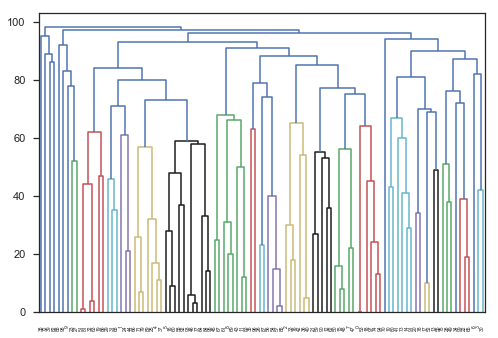

In [30]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

gtk_columns = [col for col in gtk.columns.values]
gtk_sample = gtk[gtk_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
gtk_hier = hier_clust.fit(gtk_sample)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(gtk_hier)

A medida que baja de 100 a 0, hace la separación de los grupos que difieren en ese tanto por ciento.

Cuanto más bajo es el porcentaje, los clusters son más pequeños.

### StandardScaler

The value ranges are remarkably different across various categories. It could cause issues in our clustering. The way to reduce the problem is through feature scaling:

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(gtk)
gtk_scale = scaler.transform(gtk)
#gtk_scale

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [32]:
# gtk_scale ---> to DataFrame

gtk_scale_df = pd.DataFrame(gtk_scale)

### K-Means Model Evaluation

### Silhouette score

To determine the best number of clusters to use:

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [56]:
for i in range(3, 20):
    kmeans = KMeans(n_clusters=i)
    gtk_kmeans = kmeans.fit(gtk_scale)

    score = silhouette_score(gtk_scale, gtk_kmeans.labels_, metric='euclidean')
    print("Silhouette score {} clusters: {}".format(i, score))

Silhouette score 3 clusters: 0.06616986374698583
Silhouette score 4 clusters: 0.028212702574584775
Silhouette score 5 clusters: 0.041397368297258166
Silhouette score 6 clusters: 0.04376606427793574
Silhouette score 7 clusters: 0.05797072214585356
Silhouette score 8 clusters: 0.06359578261987008
Silhouette score 9 clusters: 0.06812304977152156
Silhouette score 10 clusters: 0.06921758076620799
Silhouette score 11 clusters: 9.775493989963521e-05
Silhouette score 12 clusters: 0.060753718340113075
Silhouette score 13 clusters: 0.0702503010572194
Silhouette score 14 clusters: 0.07321692835426767
Silhouette score 15 clusters: 0.06137743471122533
Silhouette score 16 clusters: 0.06907323880310495
Silhouette score 17 clusters: 0.07639572156016122
Silhouette score 18 clusters: 0.08278948796336097
Silhouette score 19 clusters: 0.04876670136382677


### Elbow curve

To determine the best number of clusters to use:

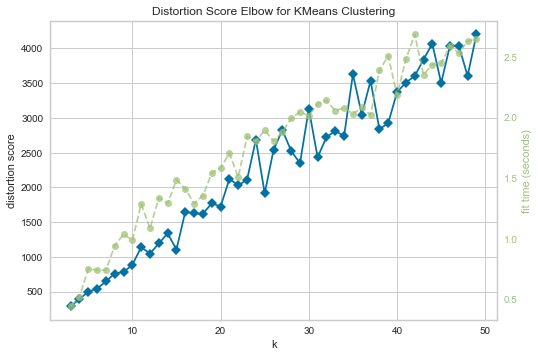

In [11]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,50))
visualizer.fit(gtk_scale)
visualizer.poof()

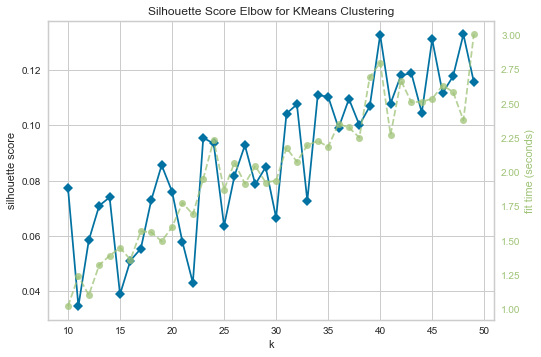

In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,50),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()

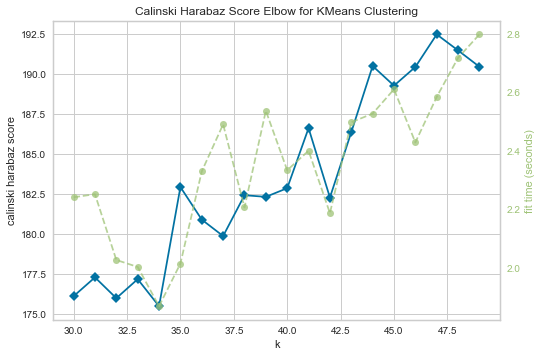

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(30,50),metric='calinski_harabaz')
visualizer.fit(gtk_scale)
visualizer.poof()

### Elbow curve - AgglomerativeClustering model 

In [ ]:
'''
from sklearn import cluster, datasets

single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10))
visualizer.fit(gtk_scale)
visualizer.poof()
'''

In [ ]:
'''
single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()
'''

## K-Means Scatter Matrix 

Showing how the clusters are grouped across all the different combinations of variables in the data:

In [96]:
from sklearn import cluster, datasets
kmeans = cluster.KMeans(n_clusters=3)
gtk_clusters = kmeans.fit(gtk_scale_df)

gtk['labels'] = gtk_clusters.labels_ # Create hue

In [34]:
cols = gtk.columns.tolist()

cols = cols[-1:] + cols[:-1] # Change column order, so labels is at the beginning

gtk = gtk[cols]

In [92]:
gtk.head()

,labels,iyear,imonth,more_than_24h,suicide,nkill,positive_sentiment,negative_sentiment,kill,attack,...,band_name_Other,band_name_Palestinian Extremists,band_name_Revolutionary Armed Forces of Colombia (FARC),band_name_Salafist Group for Preaching and Fighting (GSPC),band_name_Separatists,band_name_Taliban,band_name_Tehrik-i-Taliban Pakistan (TTP),band_name_Unknown,Cluster,labels_DBSCAN
0,2,1970,3,0,0,2,0.000,0.227,1,0,...,1,0,0,0,0,0,0,0,1,-1
1,3,1970,3,0,0,2,0.031,0.306,0,0,...,1,0,0,0,0,0,0,0,3,-1
2,2,1970,3,0,0,1,0.000,0.288,1,0,...,1,0,0,0,0,0,0,0,1,-1
3,2,1970,4,0,0,1,0.000,0.324,1,0,...,1,0,0,0,0,0,0,0,1,-1
4,2,1970,5,0,0,1,0.000,0.316,1,0,...,1,0,0,0,0,0,0,0,1,-1


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


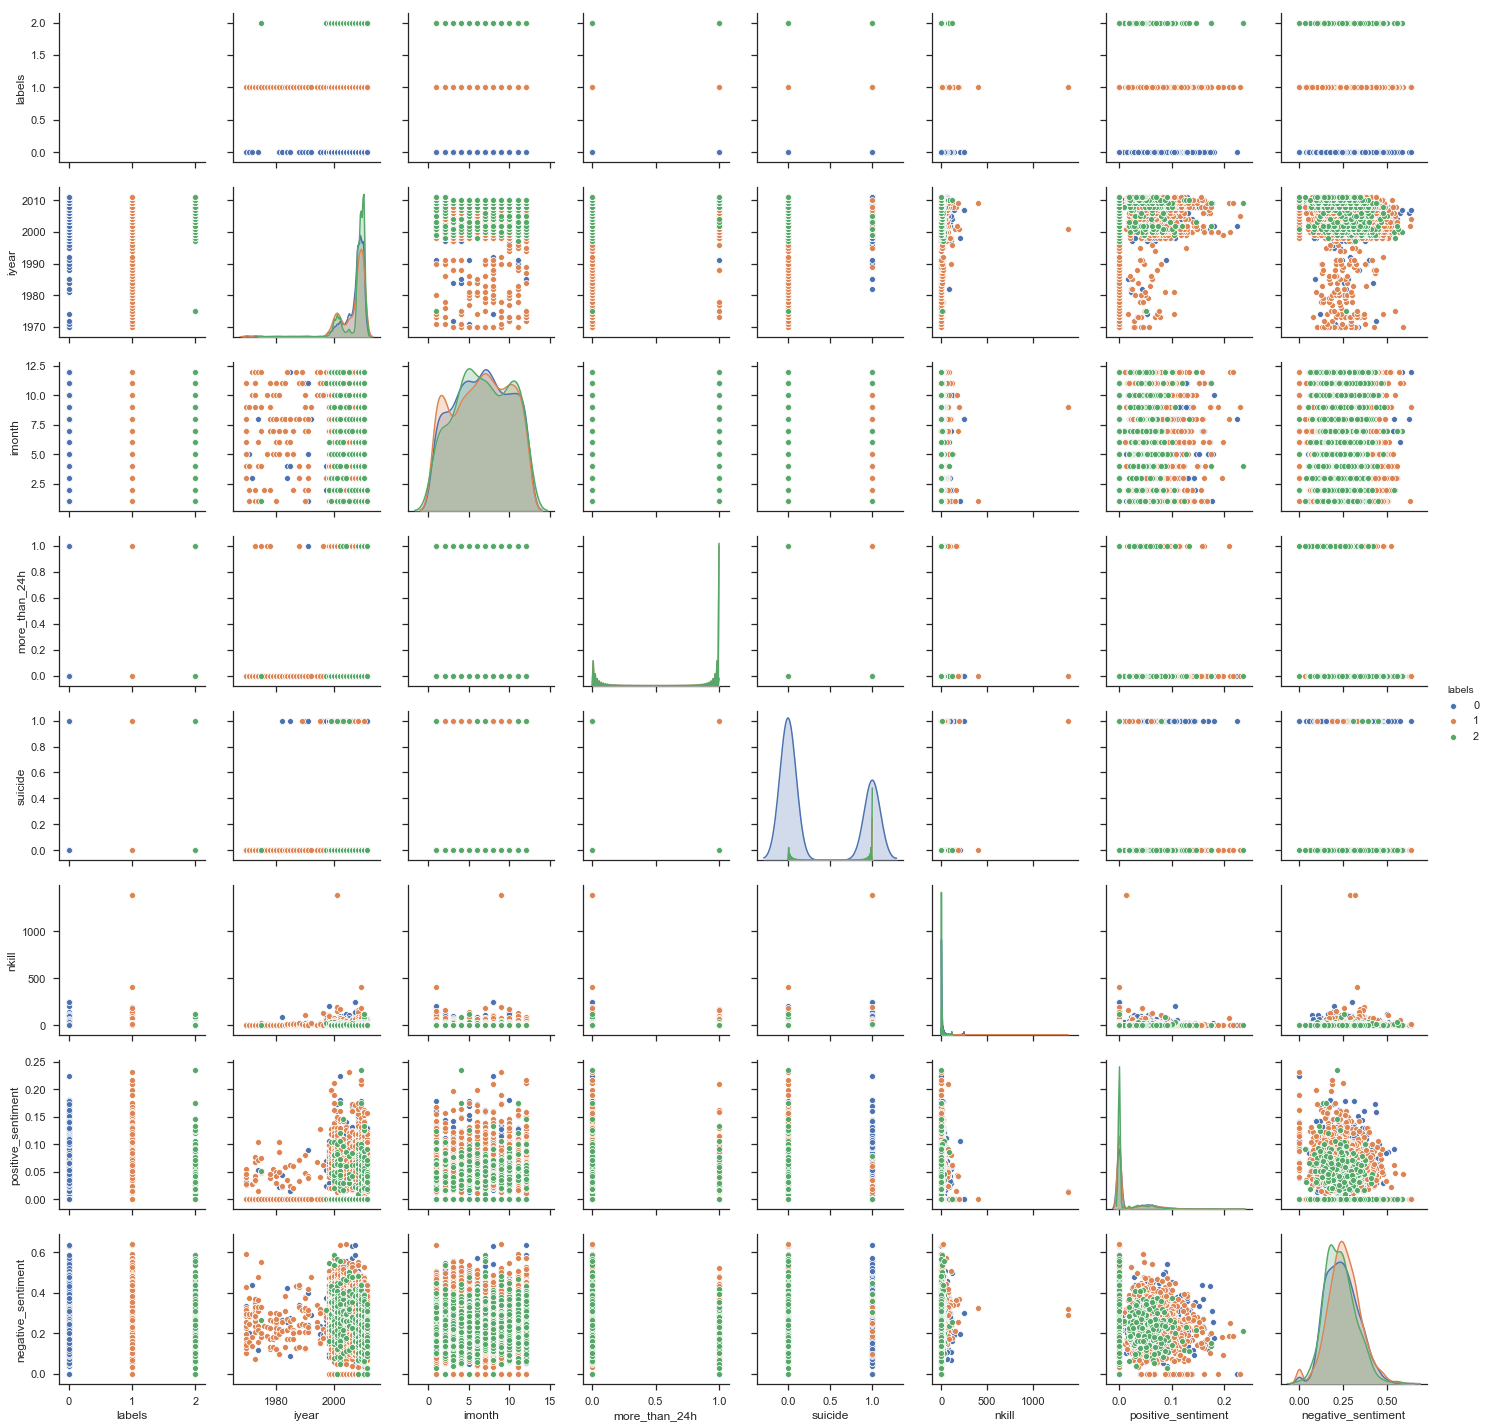

In [97]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

sns.pairplot(gtk[gtk.columns[:8]], hue = 'labels')

In [ ]:
# AgglomerativeClustering model with 5 clusters
'''
agglo_kmeans = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward') # linkage=single
gtk_clusters = agglo_kmeans.fit(gtk_scale)

gtk['labels_agglomerative'] = gtk_clusters.labels_ # Create hue

sns.set(style="ticks", color_codes=True)

sns.pairplot(gtk, hue = 'labels_agglomerative')
'''

## Applying PCA transform

Plotting the data will not provide us with a great deal of meaningful information. This is because the data has 124 dimensions.

Therefore, creating a two dimensional plot will only capture some of the information and might not show completely separable clusters.

That's why we'll also plot a 3D Scatter.

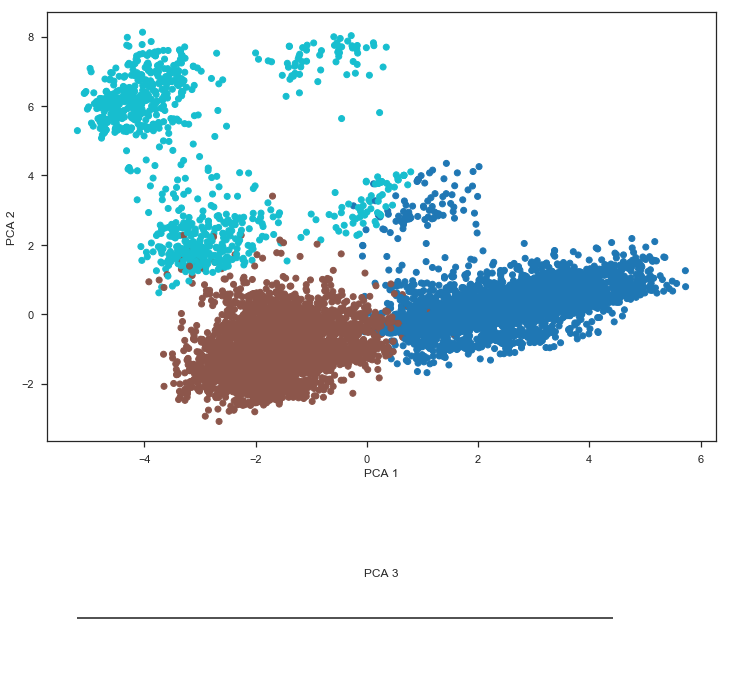

In [161]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(gtk_scale_df)
pca_gtk = pca.transform(gtk_scale_df)

fig = plt.figure(figsize=(12, 12))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 1], c=gtk.labels, cmap='tab10')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

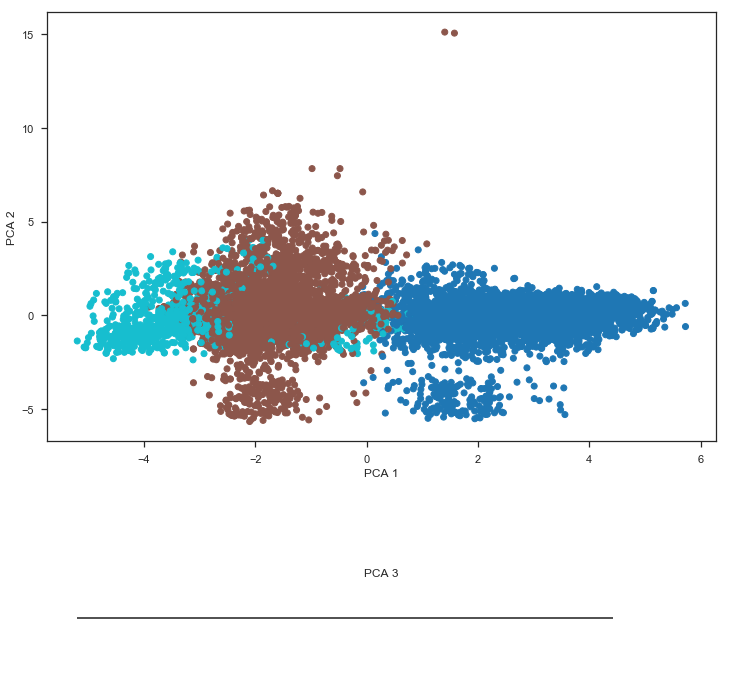

In [162]:
fig = plt.figure(figsize=(12, 12))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 6], c=gtk.labels, cmap='tab10')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

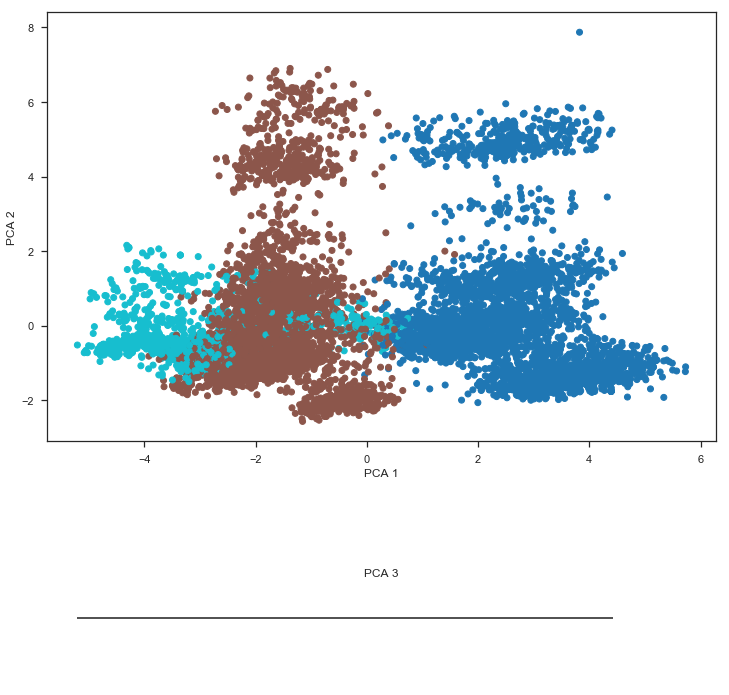

In [163]:
fig = plt.figure(figsize=(12, 12))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 3], c=gtk.labels, cmap='tab10')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

## 3D Scatter


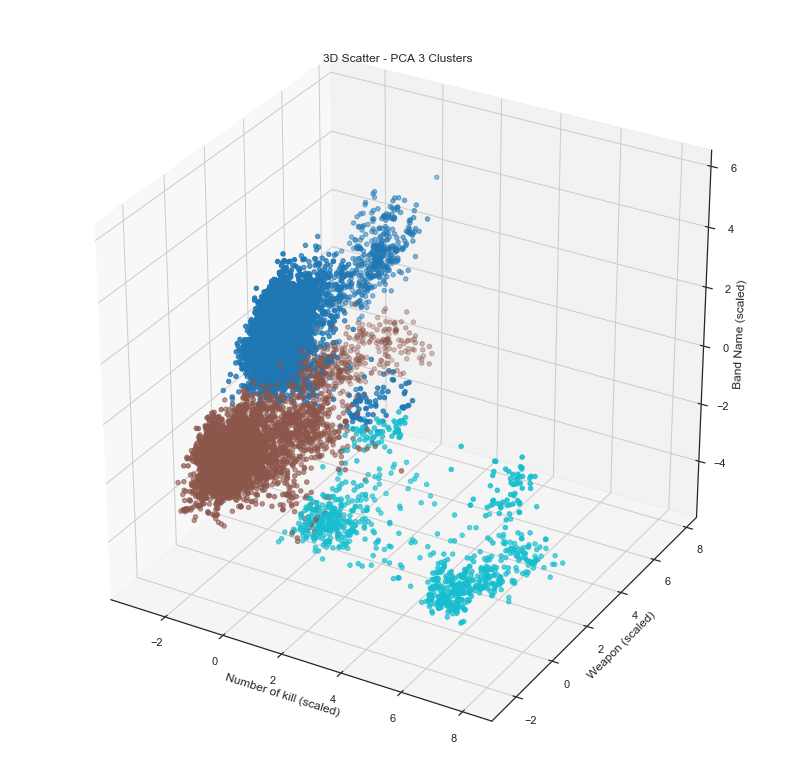

In [159]:
fig = plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

ax.set_xlabel('Number of kill (scaled)')
ax.set_ylabel('Weapon (scaled)')
ax.set_zlabel('Band Name (scaled)')

plt.title('3D Scatter - PCA 3 Clusters')

zdata = pca_gtk[:, 0] # 1 dimension. Band Name (scaled)
xdata = pca_gtk[:, 1] # 2 dimension. N kill (scaled)
ydata = pca_gtk[:, 3] # 3 dimension. Weapon (scaled)

ax.scatter3D(xdata, ydata, zdata, c=gtk.labels, cmap='tab10')

### Rotated

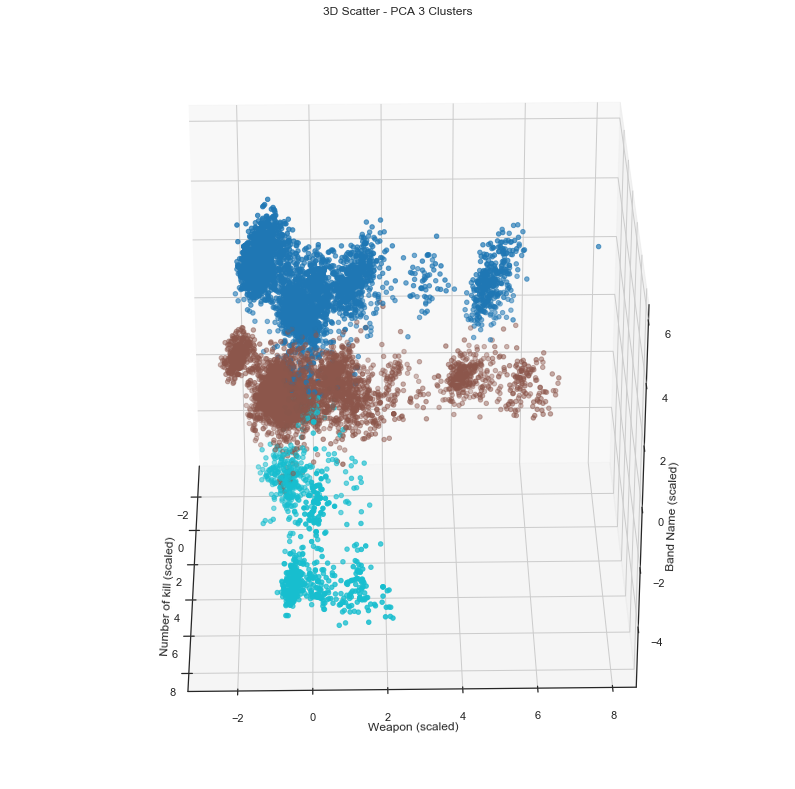

In [167]:
fig = plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

ax.view_init(30, angle) # rotate
plt.draw()

ax.set_xlabel('Number of kill (scaled)')
ax.set_ylabel('Weapon (scaled)')
ax.set_zlabel('Band Name (scaled)')

plt.title('3D Scatter - PCA 3 Clusters')

zdata = pca_gtk[:, 0] # 1 dimension. Band Name (scaled)
xdata = pca_gtk[:, 1] # 2 dimension. N kill (scaled)
ydata = pca_gtk[:, 3] # 3 dimension. Weapon (scaled)

ax.scatter3D(xdata, ydata, zdata, c=gtk.labels, cmap='tab10')

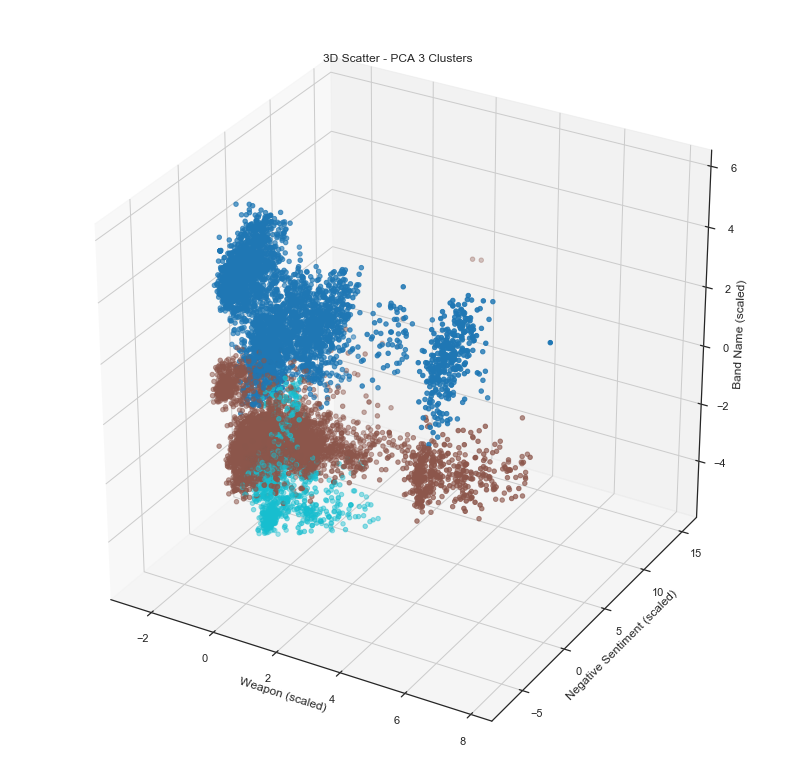

In [160]:
fig = plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

ax.set_xlabel('Weapon (scaled)')
ax.set_ylabel('Negative Sentiment (scaled)')
ax.set_zlabel('Band Name (scaled)')

plt.title('3D Scatter - PCA 3 Clusters')

zdata = pca_gtk[:, 0] # 1 dimension. Band Name (scaled)
xdata = pca_gtk[:, 3] # 2 dimension. Weapon (scaled)
ydata = pca_gtk[:, 8] # 3 dimension. Negative Sentiment (scaled)

ax.scatter3D(xdata, ydata, zdata, c=gtk.labels, cmap='tab10')

### Rotated

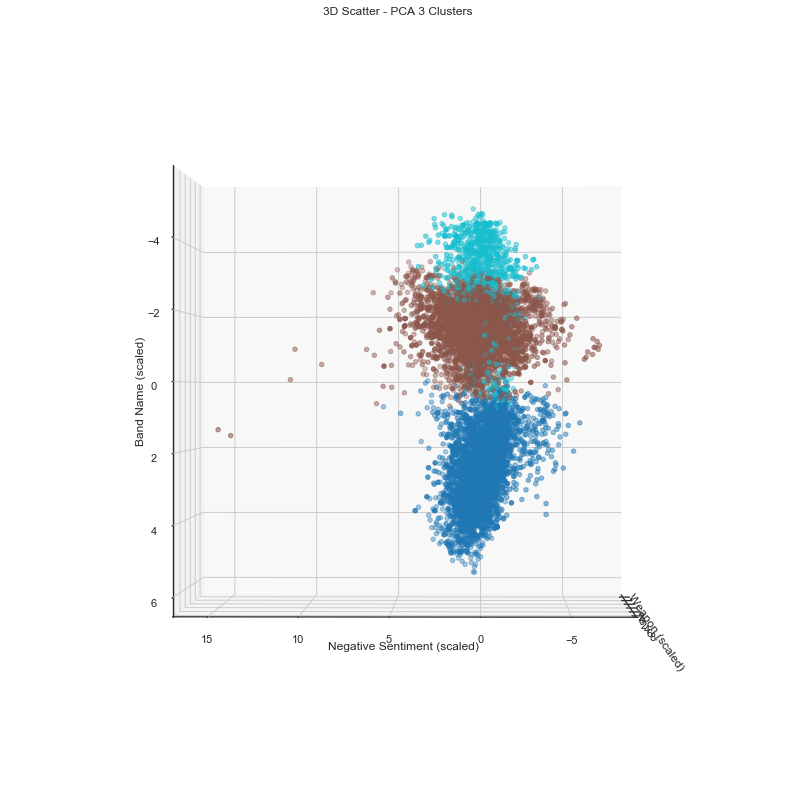

In [176]:
fig = plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

ax.view_init(360, angle) # rotate
plt.draw()

ax.set_xlabel('Weapon (scaled)')
ax.set_ylabel('Negative Sentiment (scaled)')
ax.set_zlabel('Band Name (scaled)')

plt.title('3D Scatter - PCA 3 Clusters')

zdata = pca_gtk[:, 0] # 1 dimension. Band Name (scaled)
xdata = pca_gtk[:, 3] # 2 dimension. Weapon (scaled)
ydata = pca_gtk[:, 8] # 3 dimension. Negative Sentiment (scaled)

ax.scatter3D(xdata, ydata, zdata, c=gtk.labels, cmap='tab10')

In [100]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(gtk_scale_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])
principalDf.head() 

,pc1,pc2,pc3
0,-2.723912,-1.682863,5.169755
1,0.027189,0.034545,6.613079
2,-3.186974,-1.434539,4.923417
3,-2.385309,-1.288959,4.307435
4,-3.493404,-1.138868,5.051678


The first dimension will explain the most amount of variation in the data and subsequent components will explain less and less variation. This transformation will provide us with a smaller amount of continuous variables that we can cluster more effectively.

## K-means (K = 3)

In [101]:
kmeans = KMeans(n_clusters=3)

gtk_clusters = kmeans.fit(gtk_scale) # Using Standard Scaler
gtk_clusters.cluster_centers_

array([[ 9.63445666e-02,  7.93583583e-03, -1.95813099e-01,
         5.80039571e-01,  9.37483095e-02,  5.12201871e-03,
        -5.00611606e-02,  1.64820617e-01,  3.50036185e-02,
         2.50296096e-01,  4.22586010e-01, -1.98366729e-02,
         7.12998079e-01, -3.43235640e-01,  2.66245959e-01,
        -4.66971820e-01,  5.38564360e-01,  2.42039819e-01,
        -1.63299814e-01,  5.61543538e-01,  4.11372045e-01,
         3.14573686e-01, -1.61361467e-04,  2.67452246e-02,
        -2.38887953e-02, -2.44882836e-01, -2.86864138e-01,
        -8.07196118e-01, -1.59057679e-01,  1.08737340e+00,
        -8.75111555e-02, -2.64676565e-02,  4.26461486e-03,
        -2.21301630e-01, -5.29892632e-02, -1.85310796e-01,
         1.32607007e-01, -1.91383183e-02, -7.64630162e-04,
        -1.96218296e-02, -1.73231067e-02, -7.13073983e-02,
        -8.10819687e-02,  5.65640219e-03, -2.88881062e-01,
        -3.68203586e-02,  4.42048055e-01,  9.62561820e-02,
        -2.32801159e-02,  1.05832747e-02, -2.64667781e-0

Using fit_predict, we can assign a cluster to each observation and then add this information back to our dataset:

In [102]:
gtk['Cluster'] = gtk_clusters.fit_predict(gtk_scale)
gtk.Cluster.value_counts()

2    4856
0    4167
1     977
Name: Cluster, dtype: int64

The majority of the data is in the cluster 2, while cluster 1 has few observations.

Plotting the data will not provide us with a great deal of meaningful information. 
This is because the data has 124 dimensions. 

Therefore, creating a two dimensional plot will only capture some of the information and might not show completely separable clusters. 
However, it is interesting to look at some summary statistics for our clusters:

## Attack Types in each Cluster

In [103]:
for x in range(0,3):
    clust = (gt[gtk.Cluster == x]['attacktype_txt'].value_counts())
    print('Cluster {}:\n\n{}\n\n'.format(x, clust))

Cluster 0:

Bombing/Explosion                      3928
Assassination                           210
Armed Assault                            11
Hostage Taking (Barricade Incident)      10
Hostage Taking (Kidnapping)               4
Hijacking                                 4
Name: attacktype_txt, dtype: int64


Cluster 1:

Armed Assault                          585
Bombing/Explosion                      135
Hostage Taking (Kidnapping)            130
Assassination                           56
Unknown                                 48
Facility/Infrastructure Attack          17
Unarmed Assault                          4
Hostage Taking (Barricade Incident)      2
Name: attacktype_txt, dtype: int64


Cluster 2:

Armed Assault                          3381
Assassination                           710
Hostage Taking (Kidnapping)             351
Unknown                                 284
Facility/Infrastructure Attack           59
Unarmed Assault                          24
Bombing/Explosion 

## Band Name in each Cluster

In [104]:
for x in range(0,3):
    clust = (gt[gtk.Cluster == x]['band_name'].value_counts())
    print('Cluster {}:\n\n{}\n\n'.format(x, clust))

Cluster 0:

Unknown                                             2579
Other                                                581
Taliban                                              281
Liberation Tigers of Tamil Eelam (LTTE)              148
Al-Qaida in Iraq                                     107
Tehrik-i-Taliban Pakistan (TTP)                       84
Algerian Islamic Extremists                           78
Hamas (Islamic Resistance Movement)                   61
Al-Qaida in the Islamic Maghreb (AQIM)                59
Revolutionary Armed Forces of Colombia (FARC)         49
Salafist Group for Preaching and Fighting (GSPC)      39
Al-Shabaab                                            37
Kurdistan Workers' Party (PKK)                        19
Al-Qaida in the Arabian Peninsula (AQAP)              14
Abu Sayyaf Group (ASG)                                11
Muslim extremists                                      6
New People's Army (NPA)                                5
Palestinian Extremi

## Target Type in each Cluster

In [105]:
for x in range(0,3):
    clust = (gt[gtk.Cluster == x]['targtype_txt'].value_counts())
    print('Cluster {}:\n\n{}\n\n'.format(x, clust))

Cluster 0:

Private Citizens & Property       1377
Police                             553
Government (General)               506
Military                           479
Business                           464
Transportation                     249
Religious Figures/Institutions     162
Terrorists/Non-State Militia        93
Unknown                             54
Government (Diplomatic)             51
Educational Institution             50
Utilities                           21
Airports & Aircraft                 21
Journalists & Media                 16
Tourists                            15
Maritime                            12
NGO                                 11
Violent Political Party             11
Other                                9
Telecommunication                    7
Food or Water Supply                 5
Abortion Related                     1
Name: targtype_txt, dtype: int64


Cluster 1:

Private Citizens & Property       393
Government (General)              186
Police 

## Weapon in each Cluster

In [106]:
for x in range(0,3):
    clust = (gt[gtk.Cluster == x]['weapon_txt'].value_counts())
    print('Cluster {}:\n\n{}\n\n'.format(x, clust))

Cluster 0:

Explosives                 4158
Chemical                      3
Vehicle (not explosive)       2
Melee                         2
Radiological                  1
Firearms                      1
Name: weapon_txt, dtype: int64


Cluster 1:

Firearms      638
Explosives    151
Unknown        90
Melee          83
Incendiary     15
Name: weapon_txt, dtype: int64


Cluster 2:

Firearms                   4005
Unknown                     442
Melee                       264
Incendiary                   75
Explosives                   52
Vehicle (not explosive)       9
Other                         3
Chemical                      3
Sabotage Equipment            2
Fake Weapons                  1
Name: weapon_txt, dtype: int64




## Mean number of kills in each Cluster

In [107]:
gtk.groupby(['Cluster'])['nkill'].mean()

Cluster
0    7.223662
1    3.248721
2    3.640445
Name: nkill, dtype: float64

gg
j
j
j


# Clustering with DBSCAN


In [111]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8)
gtk_dbscan = dbscan.fit(gtk_scale)
gtk['labels_DBSCAN'] = gtk_dbscan.labels_

gtk['labels_DBSCAN'].value_counts()

-1     9685
 7       46
 8       44
 20      14
 9       13
 32      12
 19      12
 23      11
 27       9
 31       8
 15       8
 14       8
 13       7
 24       7
 6        7
 21       6
 1        6
 17       6
 25       6
 2        6
 18       6
 4        6
 12       6
 0        6
 26       5
 3        5
 10       5
 11       5
 33       5
 22       5
 29       5
 30       5
 28       5
 16       5
 5        5
Name: labels_DBSCAN, dtype: int64

### K-Means vs DBSCAN

Text(0, 0.5, 'Number of Kills')

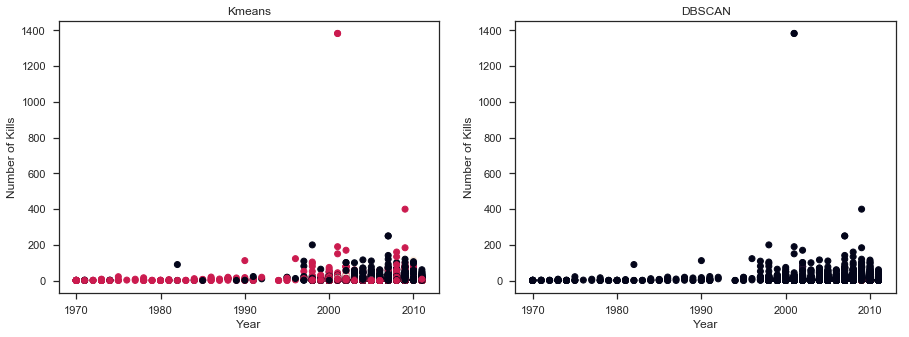

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")

Text(0, 0.5, 'Negative Sentiment')

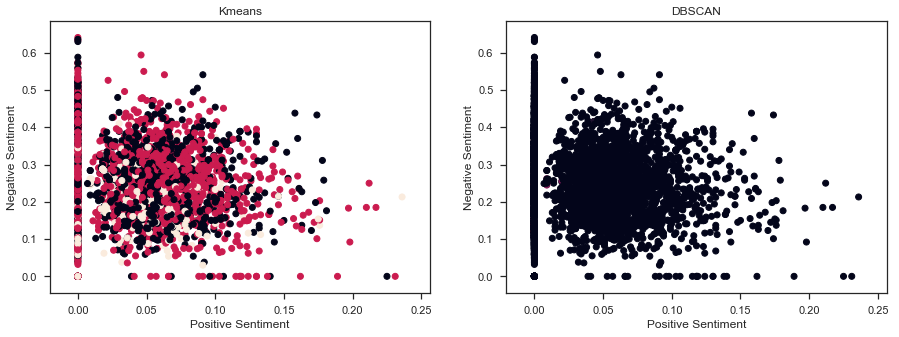

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['positive_sentiment'], gtk['negative_sentiment'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Positive Sentiment")
ax1.set_ylabel("Negative Sentiment")

ax2.scatter(gtk['positive_sentiment'], gtk['negative_sentiment'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Positive Sentiment")
ax2.set_ylabel("Negative Sentiment")